In [275]:
import pandas as pd
import numpy as np
import os
import shutil
import statistics
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from matplotlib.backends.backend_pdf import PdfPages
import movieslib #as mov

import importlib
importlib.reload(movieslib)

<module 'movieslib' from '/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py'>

In [112]:
FOLDER_INPUT = './12movies_cuts/'
FOLDER_OUTPUT = './extr_stat'

df = pd.read_csv("./12movies_cuts/ClickHM.csv", delimiter=',')
start = 0
df[start:start+10]

,Unnamed: 0,frame,face_id,timestamp,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,...,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r
0,0,3577,0.0,149.149,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.58,0.0,0.0,0.00,0.0,0.0,0.0,0.0
1,1,3578,0.0,149.191,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.82,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2,2,3579,0.0,149.233,0.20,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.52,0.0,0.0,0.10,0.0,0.0,0.0,0.0
3,3,3580,0.0,149.274,0.41,0.10,0.0,0.0,0.0,0.0,...,0.0,0.0,0.48,0.0,0.0,0.30,0.0,0.0,0.0,0.0
4,4,3581,0.0,149.316,0.43,0.15,0.0,0.0,0.0,0.0,...,0.0,0.0,0.38,0.0,0.0,0.32,0.0,0.0,0.0,0.0
5,5,3582,0.0,149.358,0.41,0.04,0.0,0.0,0.0,0.0,...,0.0,0.0,0.24,0.0,0.0,0.45,0.0,0.0,0.0,0.0
6,6,3583,0.0,149.399,0.49,0.08,0.0,0.0,0.0,0.0,...,0.0,0.0,0.33,0.0,0.0,0.24,0.0,0.0,0.0,0.0
7,7,3584,0.0,149.441,0.47,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.60,0.0,0.0,0.19,0.0,0.0,0.0,0.0
8,8,3585,0.0,149.483,0.53,0.06,0.0,0.0,0.0,0.0,...,0.0,0.0,0.44,0.0,0.0,0.25,0.0,0.0,0.0,0.0
9,9,3586,0.0,149.525,0.53,0.09,0.0,0.0,0.0,0.0,...,0.0,0.0,0.54,0.0,0.0,0.04,0.0,0.0,0.0,0.0


In [150]:
HM = ['MonsterInLaw', 'QuantumOfSolace', 'Click', 'PiratesOfCaribbean', 'TheDarkKnight', 'FastAndFurious']
AM = ['Clean', 'Synecdoche', 'BrightStar', 'CertifiedCopy', 'Spider', 'AllOrNothing']

COLS=['movie', 'face_id', 'time', 'eyes_mean', 'eyes_SD', 'midpart_mean', 'midpart_SD',
    'mouth_mean', 'mouth_SD', 'eyes_d_mean', 'eyes_d_SD', 'midpart_d_mean', 'midpart_d_SD', 'mouth_d_mean', 'mouth_d_SD']

AUs = ['AU01_r', 'AU02_r', 'AU04_r', 'AU05_r', 'AU06_r', 'AU07_r', 'AU09_r', 'AU12_r', 'AU14_r', 'AU15_r', 'AU17_r', 'AU20_r', 'AU23_r', 'AU25_r', 'AU26_r']
COLSETS = {'eyes':['AU01_r', 'AU02_r', 'AU04_r'], 'midpart':['AU05_r', 'AU06_r', 'AU07_r', 'AU09_r'],
    'mouth':['AU12_r', 'AU14_r', 'AU15_r', 'AU17_r', 'AU20_r', 'AU23_r', 'AU25_r', 'AU26_r'], 
    'all':['AU01_r', 'AU02_r', 'AU04_r', 'AU05_r', 'AU06_r', 'AU07_r', 'AU09_r', 'AU12_r', 'AU14_r', 'AU15_r', 'AU17_r', 'AU20_r', 'AU23_r', 'AU25_r', 'AU26_r']}

In [2]:
filenames = mov.get_filenames(FOLDER_INPUT, file='M')
print(filenames)

NameError: name 'mov' is not defined

In [ ]:
#plot each AU as a separate graph (12*15 graphs)
#DONT LAUNCH THIS FUNCTION :D too long output

# name the Pdf file
filename = "AUgraph.pdf"  
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True


def save_image(filename):
    
    # PdfPages is a wrapper around pdf  file so there is no clash and create files with no error.
    p = PdfPages(filename)
      
    # get_fignums Return list of existing figure numbers
    fig_nums = plt.get_fignums()  
    print(fig_nums)
    figs = [plt.figure(n) for n in fig_nums]
    print(figs)
      
    # iterating over the numbers in list
    for fig in figs: 
        # and saving the files
        fig.savefig(p, format='pdf') 
      
    # close the object
    p.close()  
  




for i in filenames:
    name = i.split('.')[0][:-2]
    print('Prosess file', name, '...')
    df = pd.read_csv(FOLDER_INPUT + i, delimiter=',')
    print('ok reading csv...')

    for item in COLSETS['all']:
        fig = plt.figure()
        au = list(df[item])
        plt.hist(au, bins=50, range=[min(au)+0.001, 5], lw=1, ec="yellow", fc="blue", alpha=0.5)
        plt.title(name + ' ' + item)
  
# call the function
save_image(filename)

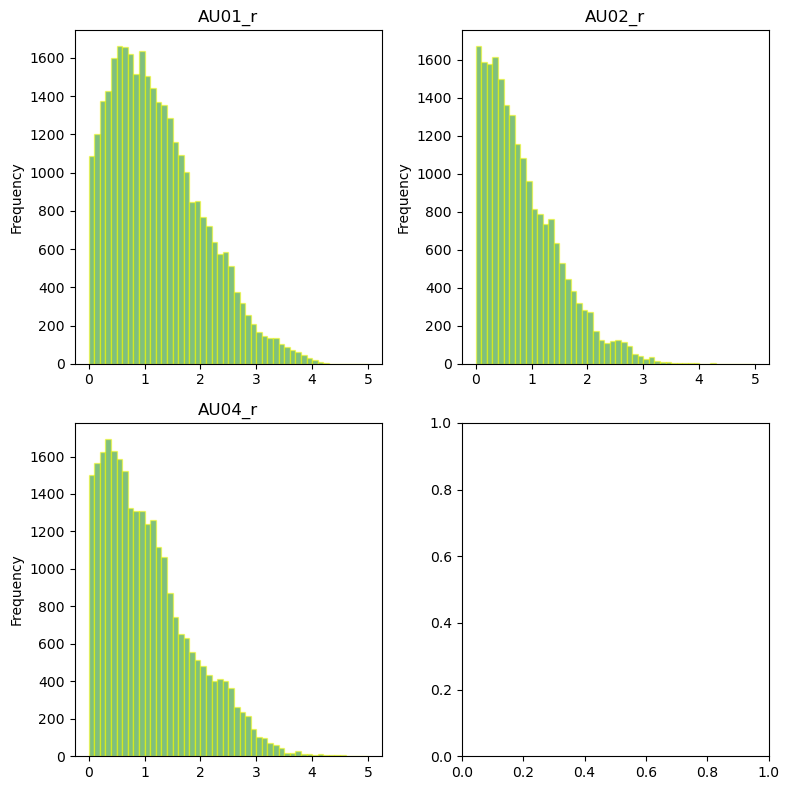

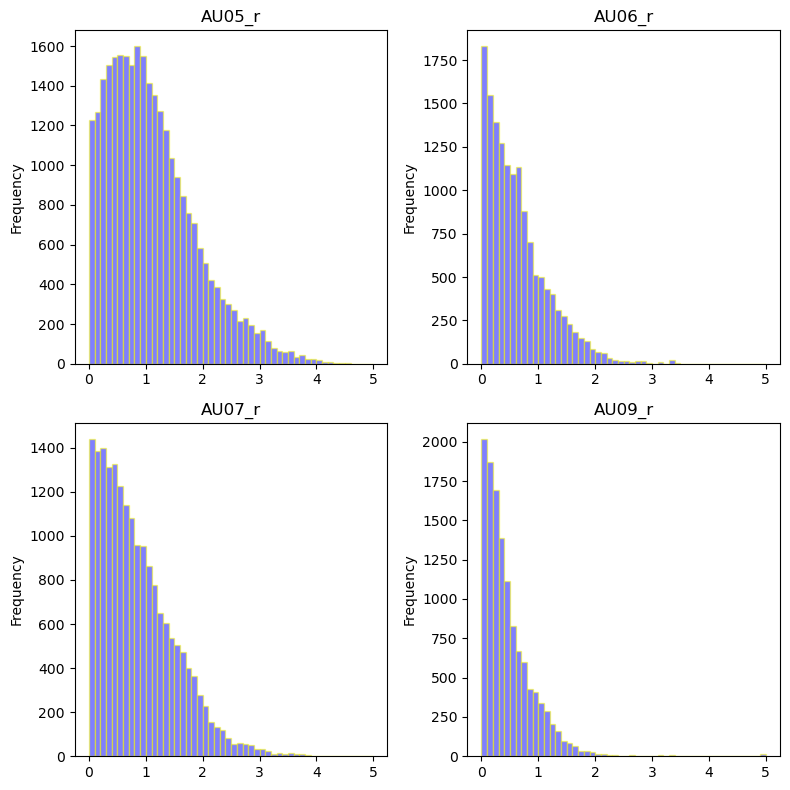

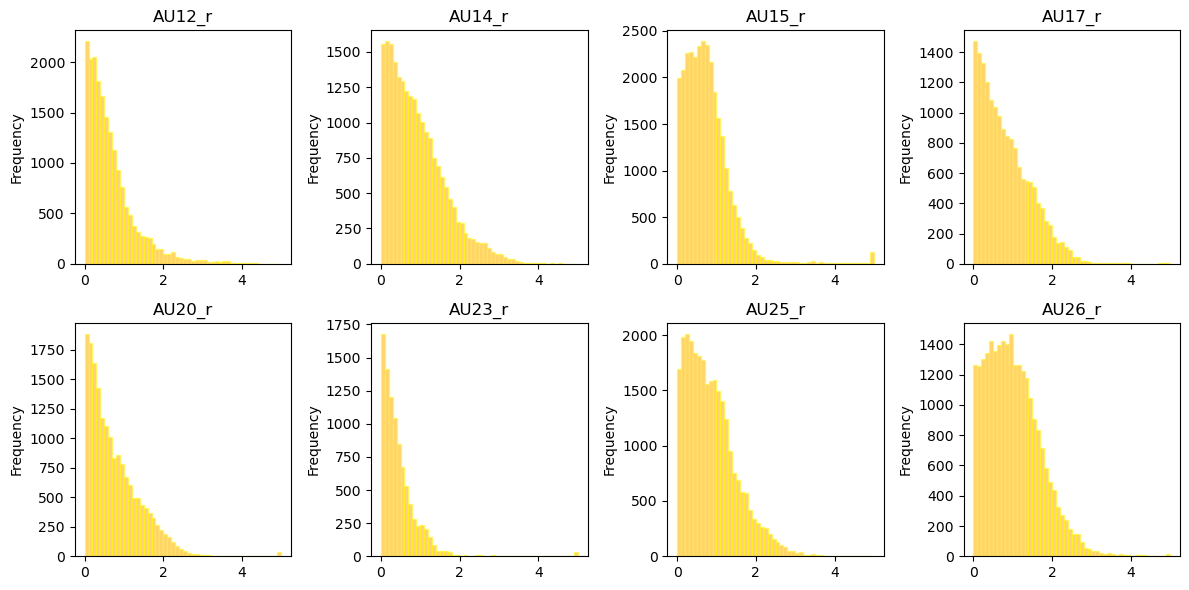

In [258]:
#plot graphs divided by category (eyes, midpart, mouth)

pdf = PdfPages("output.pdf")
# set figure:eyes
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

count = 0
for i in range(2):
    for j in range(2):
        if i + j > 1:
            continue
        au = COLSETS['eyes'][count]
        df[au].plot.hist(bins=50, range=[0.001, 5], ec="yellow", fc="green", alpha=0.5, ax=ax[i, j])
        ax[i, j].set_title(au)
        count += 1

plt.tight_layout()
plt.show()
pdf.savefig(fig)


# set figure: midpart
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

count = 0
for i in range(2):
    for j in range(2):
        au = COLSETS['midpart'][count]
        df[au].plot.hist(bins=50, range=[0.001, 5], ec="yellow", fc="blue", alpha=0.5, ax=ax[i, j])
        ax[i, j].set_title(au)
        count += 1

plt.tight_layout()
plt.show()
pdf.savefig(fig)


# set figure: mouth
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))

count = 0
for i in range(2):
    for j in range(4):
        au = COLSETS['mouth'][count]
        df[au].plot.hist(bins=50, range=[0.001, 5], ec="yellow", fc="orange", alpha=0.5, ax=ax[i, j])
        ax[i, j].set_title(au)
        count += 1

plt.tight_layout()
plt.show()

#save plot
pdf.savefig(fig)




pdf.close()

In [1]:
#plot graphs of all AUs in all files and save in a pdf format (one figure == all AUs of one file)
#pdf = PdfPages("AUgraphs_by_movie_excl0.pdf") #filename


for i in filenames:
    name = i.split('.')[0][:-2]
    print('Prosess file', name, '...')
    df = pd.read_csv(FOLDER_INPUT + i, delimiter=',')
    print('ok reading csv...')

    # set figure
    fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(12, 6))
    fig.suptitle(name)

    count = 0
    for i in range(4):
        for j in range(4):
            if i + j > 5:
                continue
            au = COLSETS['all'][count]
            df[au].plot.hist(bins=50, range=[0.001, 5], ec="yellow", fc="green", alpha=0.5, ax=ax[i, j])
            ax[i, j].set_title(au)

            df[au].plot.hist(bins=50, range=[0.001, 5], ec="yellow", fc="green", alpha=0.1, ax=ax[3, 3])
            ax[3, 3].set_title('AU01 - AU26 overlapped')

            count += 1


    plt.tight_layout()
    plt.show()

    #save plot
    #pdf.savefig(fig)

#pdf.close()

NameError: name 'filenames' is not defined

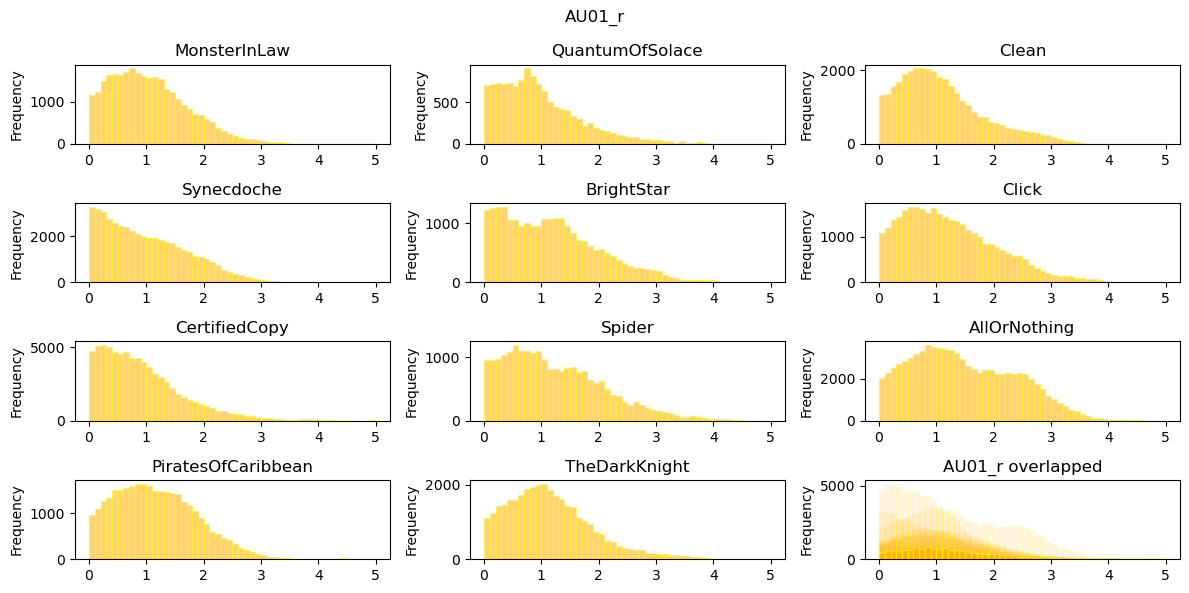

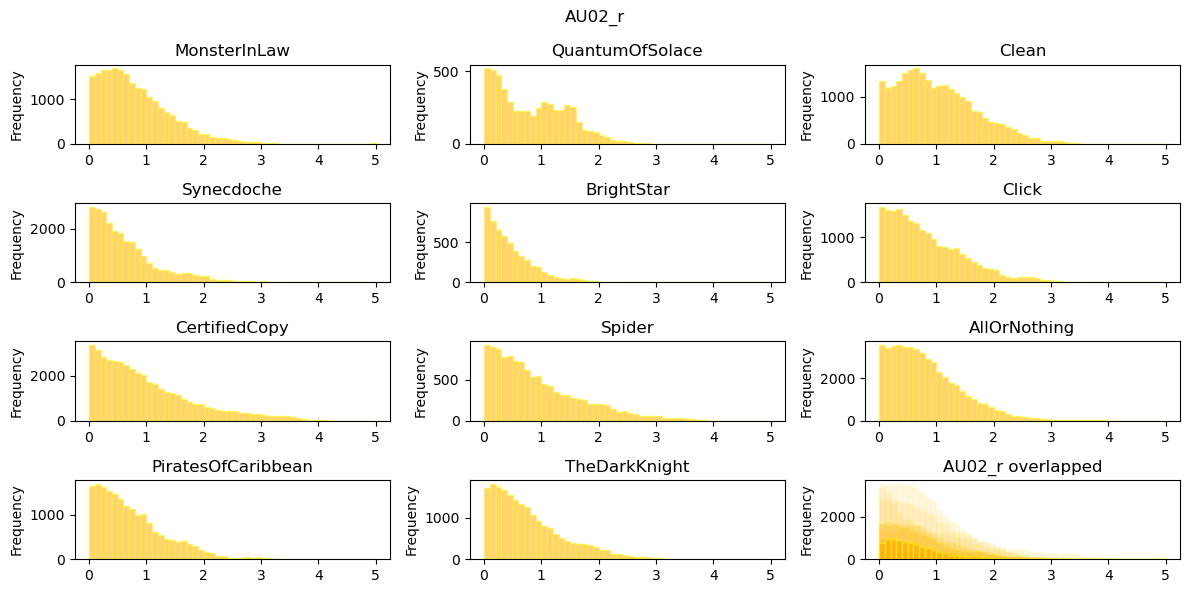

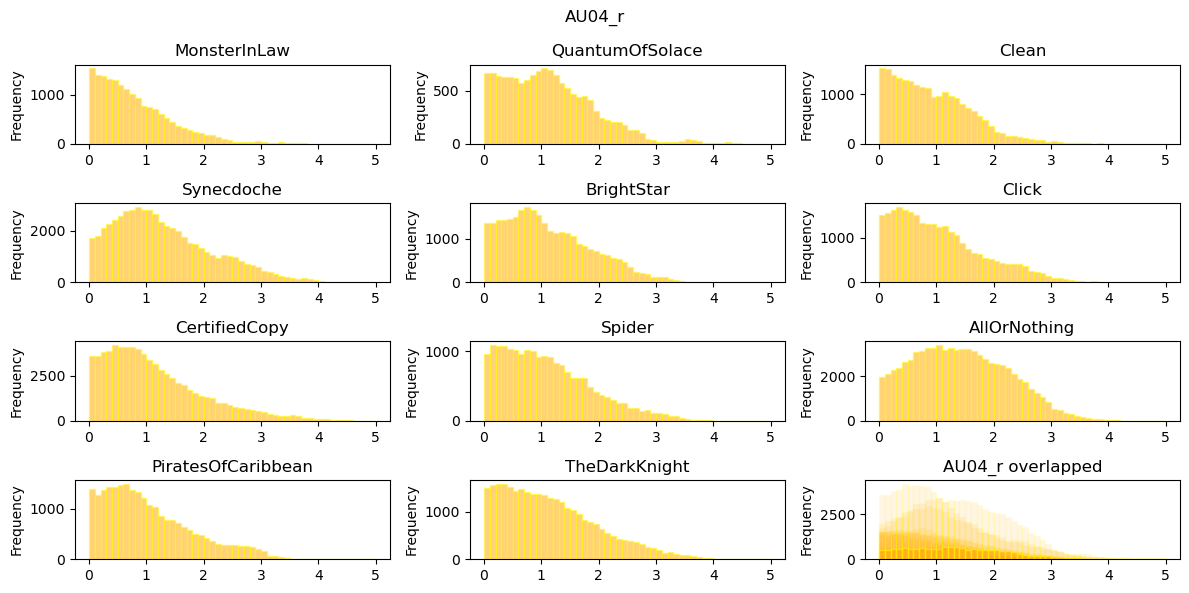

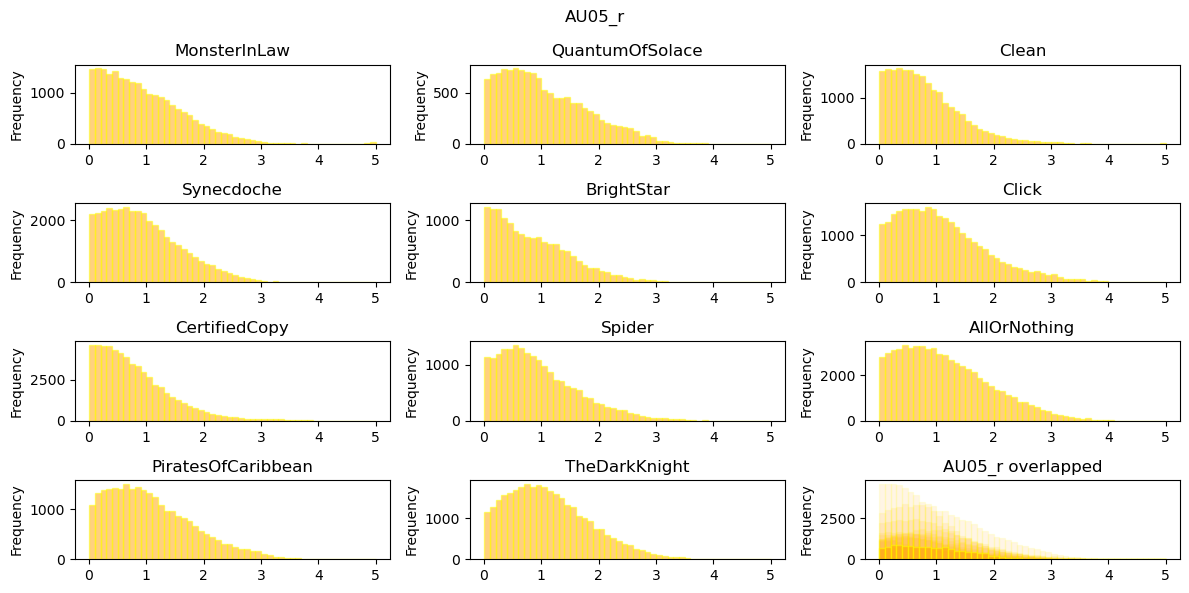

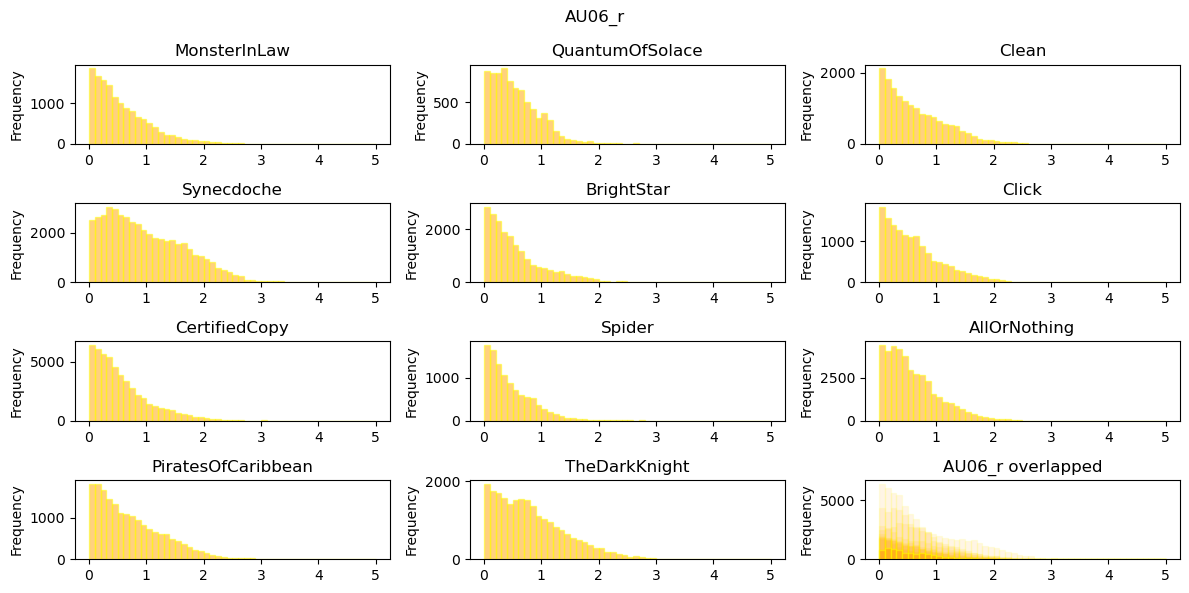

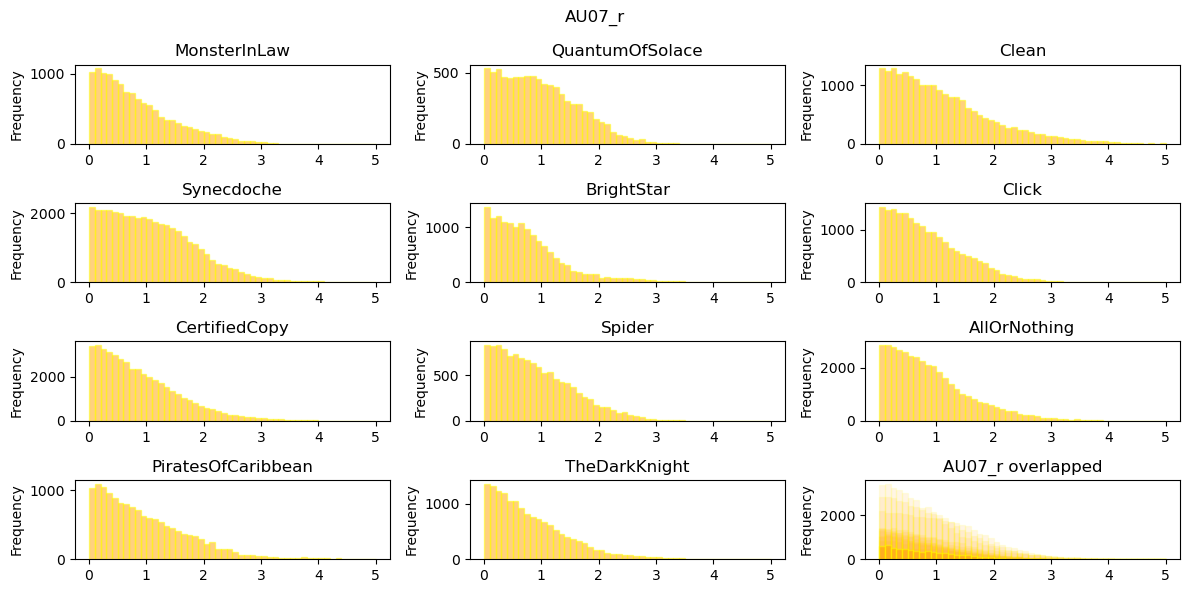

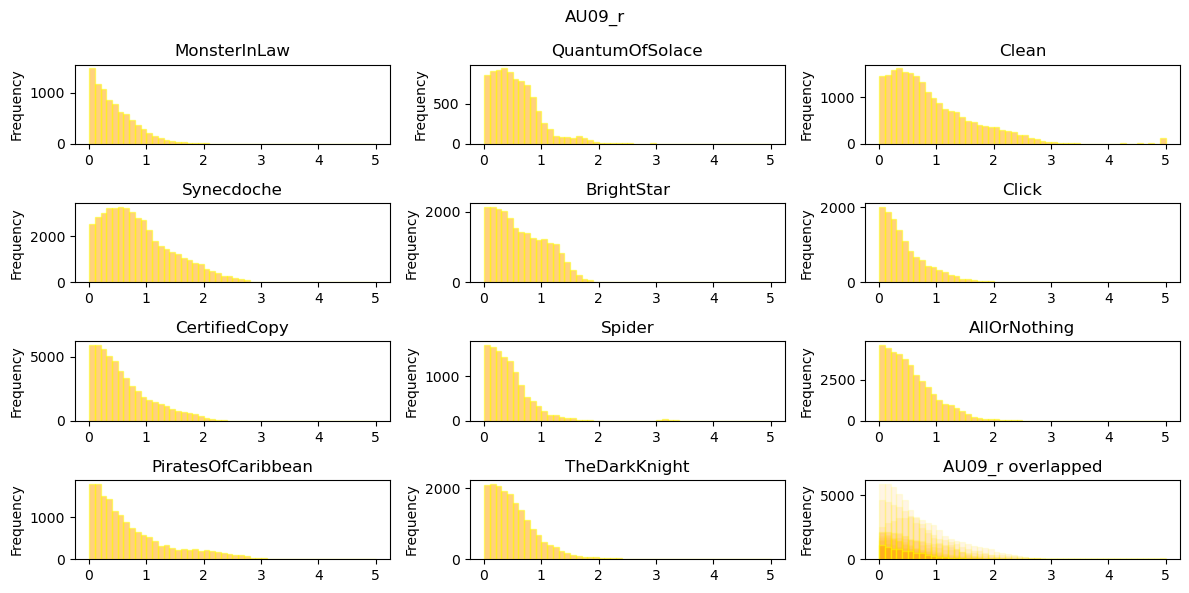

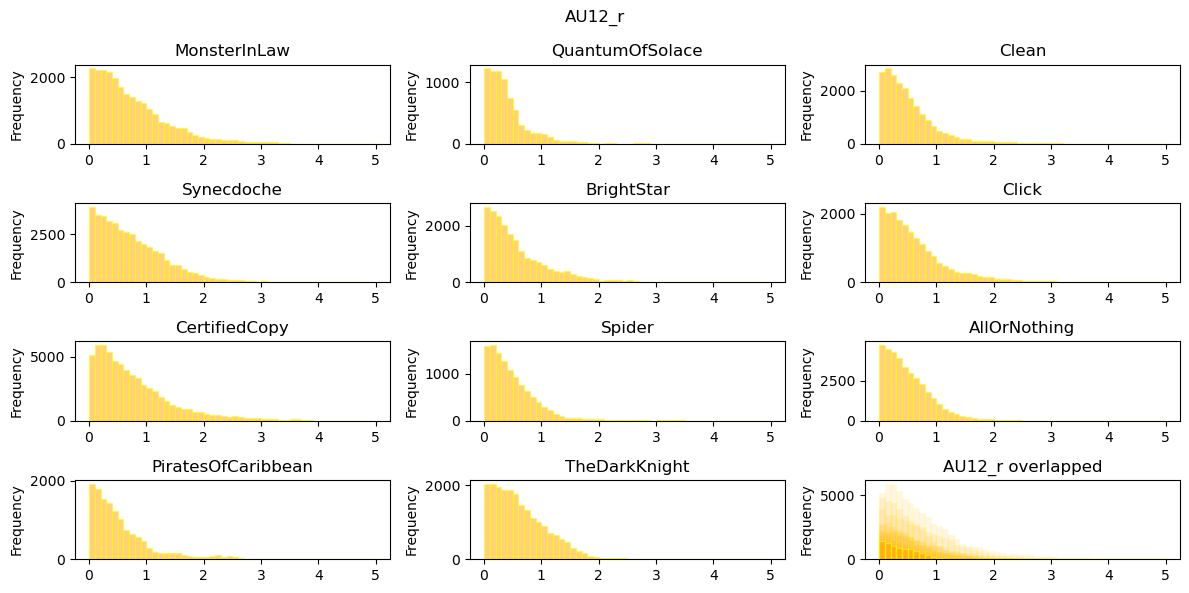

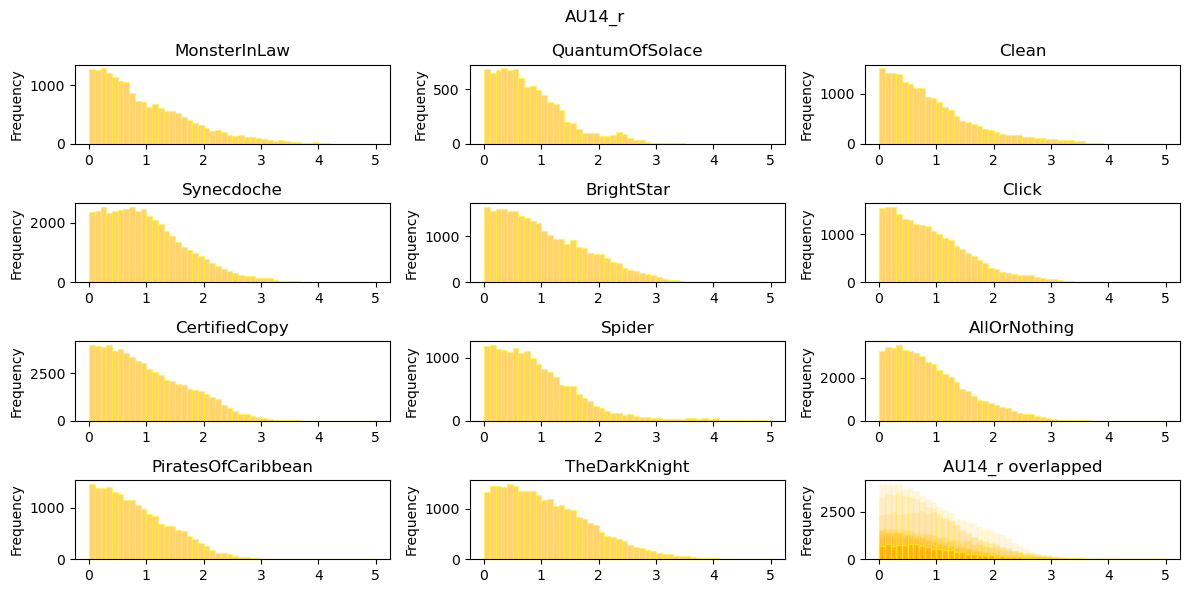

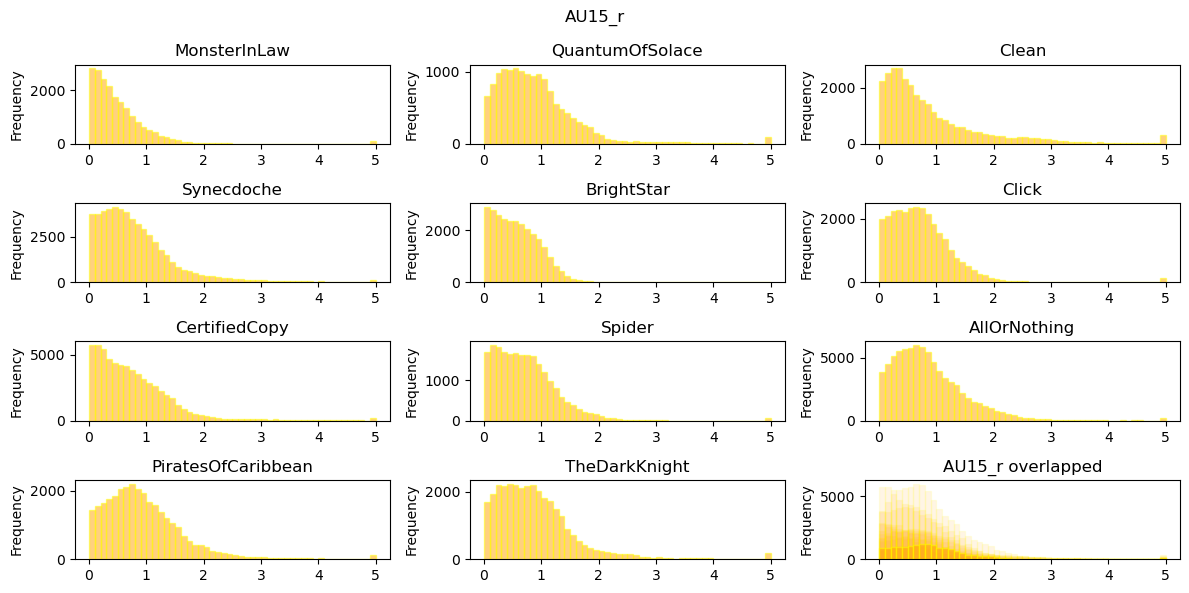

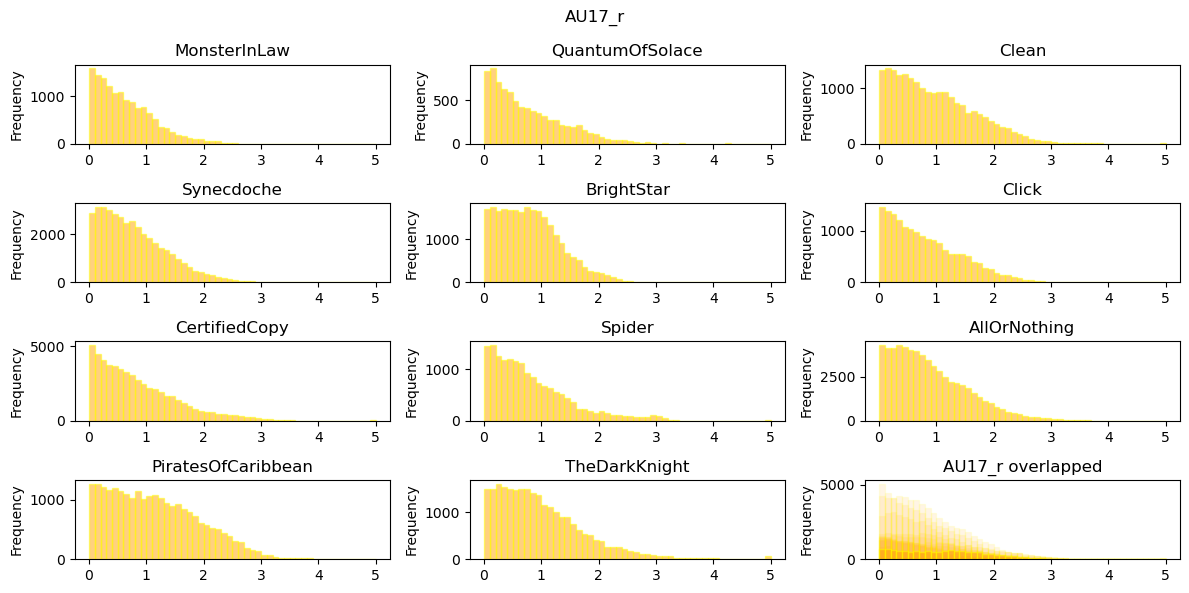

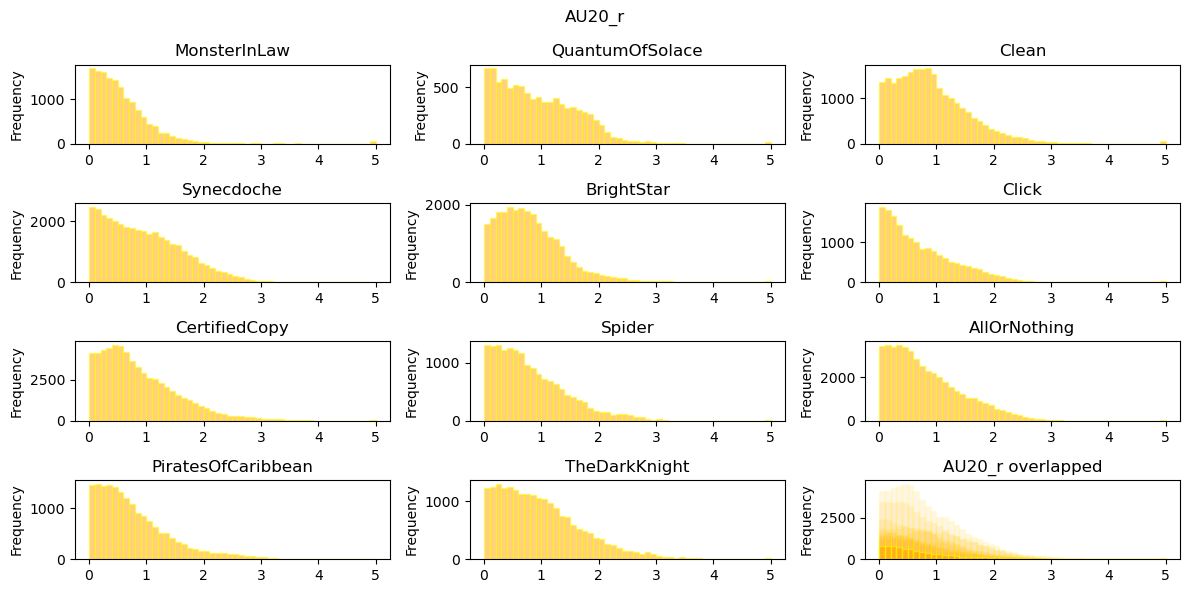

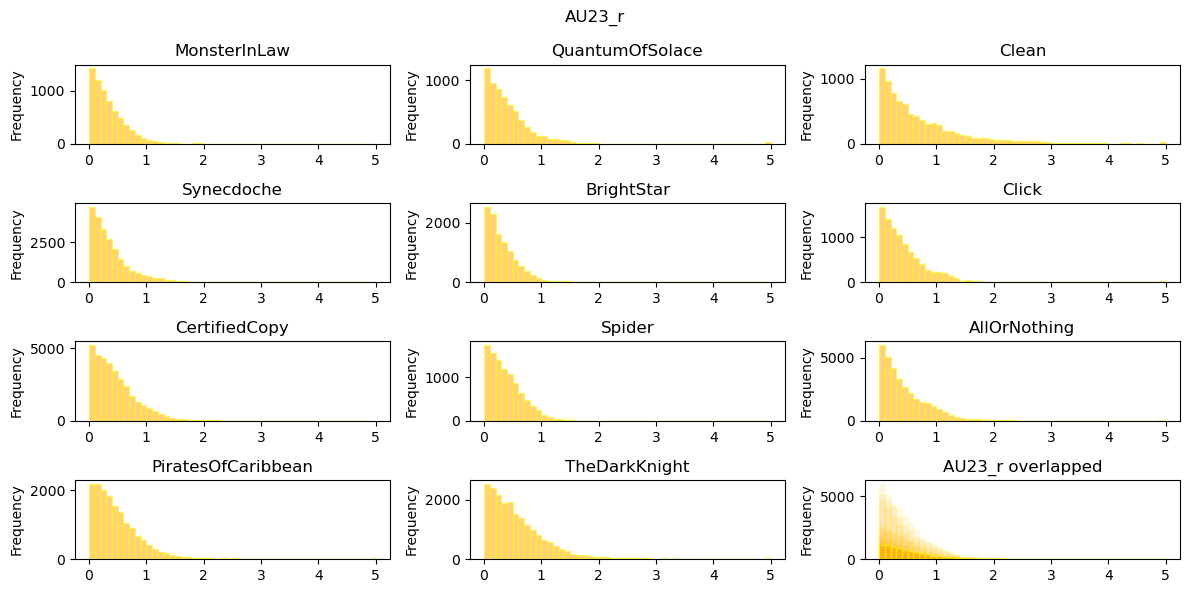

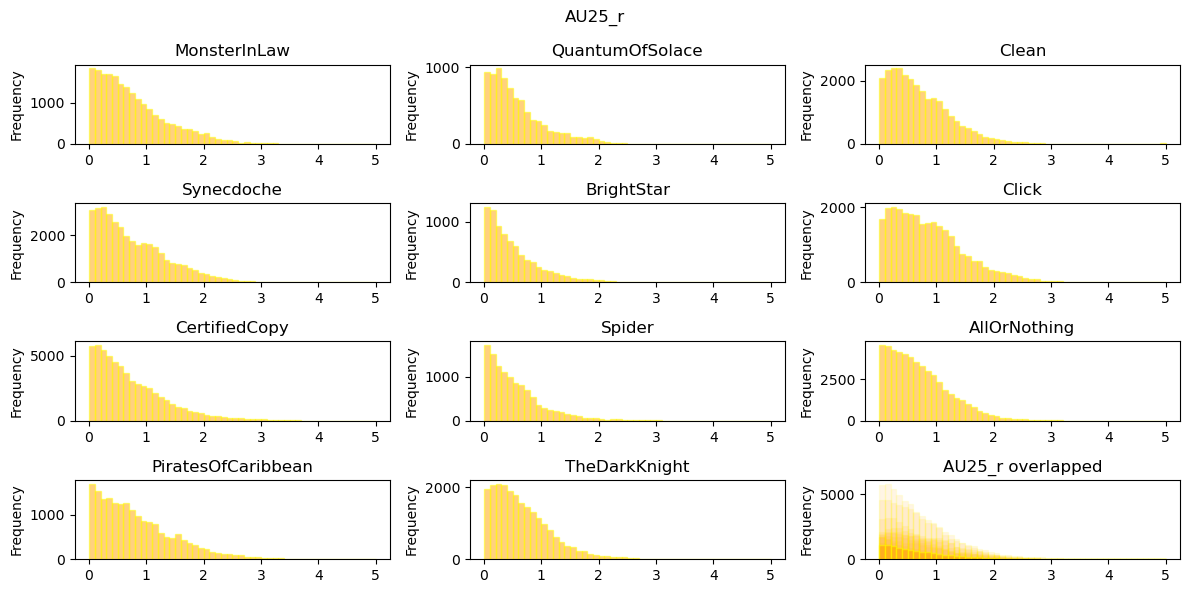

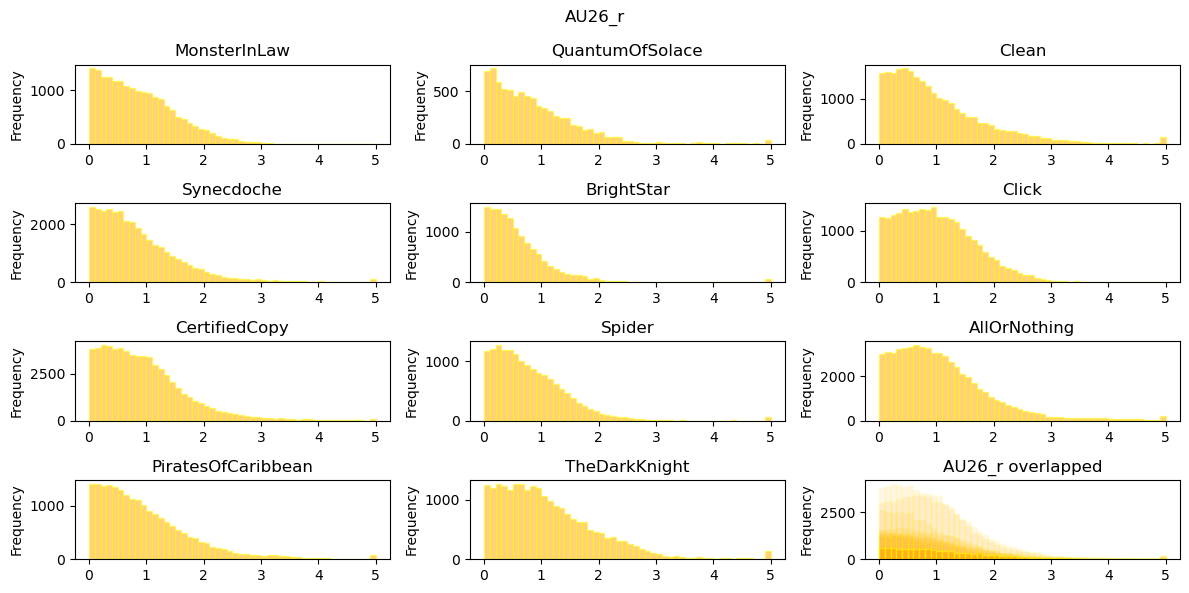

In [302]:
#get data of all files in one dictionary
data = {}

for i in filenames:
    name = i.split('.')[0][:-2]
    print('Prosess file', name, '...')
    df = pd.read_csv(FOLDER_INPUT + i, delimiter=',')
    print('ok reading csv...')
    data[name] = df



#plot graphs of all AUs in all files and save in a pdf format (one figure == all AUs of one file)
pdf = PdfPages("AU_by_number_excl0.pdf") #filename


for au in COLSETS['all']:
    # set figure
    fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(12, 6))
    fig.suptitle(au)

    
    names = list(data.keys())
    count = 0

    for i in range(4):
        for j in range(3):
            if i + j > 5:
                continue

            df = data[names[count]] #get a dataset; names[count] is a name of a movie

            au_i = df[au]
            au_i.plot.hist(bins=50, range=[0.001, 5], ec="yellow", fc="orange", alpha=0.5, ax=ax[i, j])
            ax[i, j].set_title(names[count])

            au_i.plot.hist(bins=50, range=[0.001, 5], ec="yellow", fc="orange", alpha=0.1, ax=ax[3, 2])
            ax[3, 2].set_title(au + ' ' + 'overlapped')

            count += 1


    plt.tight_layout()
    plt.show()

    #save plot
    pdf.savefig(fig)

pdf.close()